## 利用朴素贝叶斯分类实现手写数字识别
## 对比不同模型实现效果（高斯贝叶斯分类器，多项贝叶斯分类器，伯努利贝叶斯分类器）

### 朴素贝叶斯分类器是一系列以假设特征之间强（朴素）独立下运用贝叶斯定理为基础的简单概率分类器。该分类器模型会给问题实例分配用特征值表示的类标签，类标签取自有限集合。它不是训练这种分类器的单一算法，而是一系列基于相同原理的算法：所有朴素贝叶斯分类器都假定样本每个特征与其他特征都不相关

### 导入第三方库及python自带手写数字数据

In [2]:
from sklearn.datasets import load_digits    # 导入手写数据
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB    # 调用三种朴素贝叶斯工具
from sklearn.model_selection import train_test_split    # 导入功能用于分离训练集与测试集
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [3]:
# 导入手写数据集
data = load_digits()
x = data.data
y = data.target

In [5]:
# 查看第一张图
print(data.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [6]:
print(data.images[0].shape)

(8, 8)


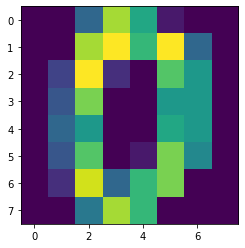

In [7]:
# 画出第一张图
plt.imshow(data.images[0])
plt.show()

In [8]:
# 第一张图归类
print(data.target[0])

0


In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)    # 划分训练集和测试集

In [14]:
# 伯努利朴素贝叶斯模型
model_Ber = BernoulliNB()
model_Ber = model_Ber.fit(x_train, y_train)
predict_Ber = model_Ber.predict(x_test)
accuracy_score_Ber = accuracy_score(y_test, predict_Ber)
print('BernoulliNB准确率为：%.4lf'% accuracy_score_Ber)
print(model_Ber.class_log_prior_)
print(model_Ber.feature_log_prob_)
print(model_Ber.class_count_)
print(model_Ber.feature_count_)

BernoulliNB准确率为：0.8472
[-2.31448583 -2.30746826 -2.27310061 -2.20140868 -2.321553   -2.30746826
 -2.24643237 -2.32867046 -2.37996376 -2.357658  ]
[[-4.9698133  -4.27666612 -0.12562621 -0.00696867 -0.00696867 -0.29698447
  -3.17805383 -4.9698133  -4.9698133  -1.09861229 -0.01398624 -0.00696867
  -0.01398624 -0.00696867 -1.1196657  -4.9698133  -4.9698133  -0.18232156
  -0.00696867 -0.18232156 -0.67935386 -0.01398624 -0.23361485 -4.9698133
  -4.9698133  -0.04983237 -0.00696867 -0.85893944 -2.57191803 -0.01398624
  -0.02105341 -4.9698133  -4.9698133  -0.02817088 -0.00696867 -1.44345277
  -3.58351894 -0.00696867 -0.03533937 -4.9698133  -4.9698133  -0.11778304
  -0.00696867 -0.87546874 -0.87546874 -0.00696867 -0.1100009  -4.9698133
  -4.9698133  -0.85893944 -0.00696867 -0.00696867 -0.02817088 -0.00696867
  -0.49247649 -4.9698133  -4.9698133  -4.27666612 -0.09461598 -0.00696867
  -0.00696867 -0.11778304 -2.07944154 -4.9698133 ]
 [-4.97673374 -4.28358656 -0.70006762 -0.19761025 -0.07145896 -0.

In [20]:
# 高斯朴素贝叶斯模型
model_Gau = GaussianNB()
model_Gau.fit(x_train, y_train)
predict_Gau = model_Gau.predict(x_test)
accuracy_score_Gau = accuracy_score(y_test, predict_Gau)
print('GaussianNB准确率为：%.4f'% accuracy_score_Gau)
print(model_Gau.class_prior_)
print(model_Gau.class_count_)
print(model_Gau.theta_)
print(model_Gau.sigma_)

GaussianNB准确率为：0.8222
[0.09881698 0.09951287 0.10299235 0.11064718 0.09812109 0.09951287
 0.10577592 0.09742519 0.09255393 0.09464161]
[142. 143. 148. 159. 141. 143. 152. 140. 133. 136.]
[[0.00000000e+00 1.40845070e-02 4.16901408e+00 1.30704225e+01
  1.12464789e+01 2.89436620e+00 3.52112676e-02 0.00000000e+00
  0.00000000e+00 8.45070423e-01 1.24436620e+01 1.34295775e+01
  1.15352113e+01 1.12746479e+01 9.85915493e-01 0.00000000e+00
  0.00000000e+00 3.49295775e+00 1.43169014e+01 5.56338028e+00
  2.11267606e+00 1.21338028e+01 3.57042254e+00 0.00000000e+00
  0.00000000e+00 5.19718310e+00 1.27676056e+01 2.12676056e+00
  1.40845070e-01 8.92957746e+00 6.57746479e+00 0.00000000e+00
  0.00000000e+00 5.78169014e+00 1.15633803e+01 9.50704225e-01
  3.52112676e-02 8.61971831e+00 7.26760563e+00 0.00000000e+00
  0.00000000e+00 3.56338028e+00 1.30845070e+01 1.69718310e+00
  1.68309859e+00 1.12535211e+01 5.87323944e+00 0.00000000e+00
  0.00000000e+00 9.22535211e-01 1.30633803e+01 9.95774648e+00
  1.049

In [21]:
# 多项式朴素贝叶斯模型
model_Mul = MultinomialNB(fit_prior = True)
model_Mul.fit(x_train, y_train)
predict_Mul = model_Mul.predict(x_test)
accuracy_score_Mul = accuracy_score(y_test, predict_Mul)
print('MultinomialNB的准确率为：%.4f'% accuracy_score_Mul)
print(model_Mul.class_log_prior_)
print(model_Mul.feature_log_prob_)
print(model_Mul.class_count_)
print(model_Mul.feature_count_)
print(model_Mul.coef_)
print(model_Mul.intercept_)

MultinomialNB的准确率为：0.9028
[-2.31448583 -2.30746826 -2.27310061 -2.20140868 -2.321553   -2.30746826
 -2.24643237 -2.32867046 -2.37996376 -2.357658  ]
[[-10.71441777  -9.61580548  -4.32922337  -3.18770021  -3.33790964
   -4.69339442  -8.9226583  -10.71441777 -10.71441777  -5.91862722
   -3.23681353  -3.16060692  -3.31257619  -3.33540964  -5.76565788
  -10.71441777 -10.71441777  -4.50582774  -3.09665819  -4.0411198
   -5.0073075   -3.26201532  -4.48393632 -10.71441777 -10.71441777
   -4.10911985  -3.21112814  -5.00068496  -7.66989533  -3.5684333
   -3.87387124 -10.71441777 -10.71441777  -4.00267737  -3.31013865
   -5.80176288  -8.9226583   -3.60372165  -3.7741953  -10.71441777
  -10.71441777  -4.48590677  -3.18662378  -5.22548004  -5.23377885
   -3.33728406  -3.98698604 -10.71441777 -10.71441777  -5.83161585
   -3.18823886  -3.45953296  -3.40721545  -3.18716185  -4.90327678
  -10.71441777 -10.71441777 -10.02127059  -4.31250057  -3.15017929
   -3.1844744   -4.11318765  -7.15906971 -10.7144